In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
train = pd.read_csv("/content/gdrive/MyDrive/loan prediction/train_loan.csv")
test = pd.read_csv("/content/gdrive/MyDrive/loan prediction/test_loan.csv")

In [ ]:
train.head()
# test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
train_original = train.copy()
test_original = test.copy()

In [ ]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

#Pre-processing the data

In [ ]:
# find the null values
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
# fill the missing values for numerical terms
train['LoanAmount'] = train['LoanAmount'].fillna(train['LoanAmount'].mean())
train['Loan_Amount_Term'] = train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mean())
train['Credit_History'] = train['Credit_History'].fillna(train['Credit_History'].mean())

In [ ]:
# fill the missing values for categorical terms
train['Gender'] = train['Gender'].fillna(train['Gender'].mode()[0])
train['Married'] = train['Married'].fillna(train['Married'].mode()[0])
train['Dependents'] = train['Dependents'].fillna(train['Dependents'].mode()[0])
train['Self_Employed'] = train['Self_Employed'].fillna(train['Self_Employed'].mode()[0])

In [ ]:
train.shape , test.shape

((614, 13), (367, 12))

In [ ]:
train["Loan_Status"].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [ ]:
train["Loan_Status"].value_counts(normalize = True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

<Axes: >

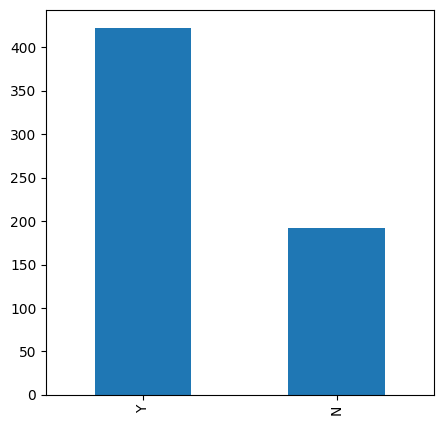

In [ ]:
train["Loan_Status"].value_counts().plot.bar(figsize=(5,5))

The loan of 422 (around 69%) out of 614 people has been approved.

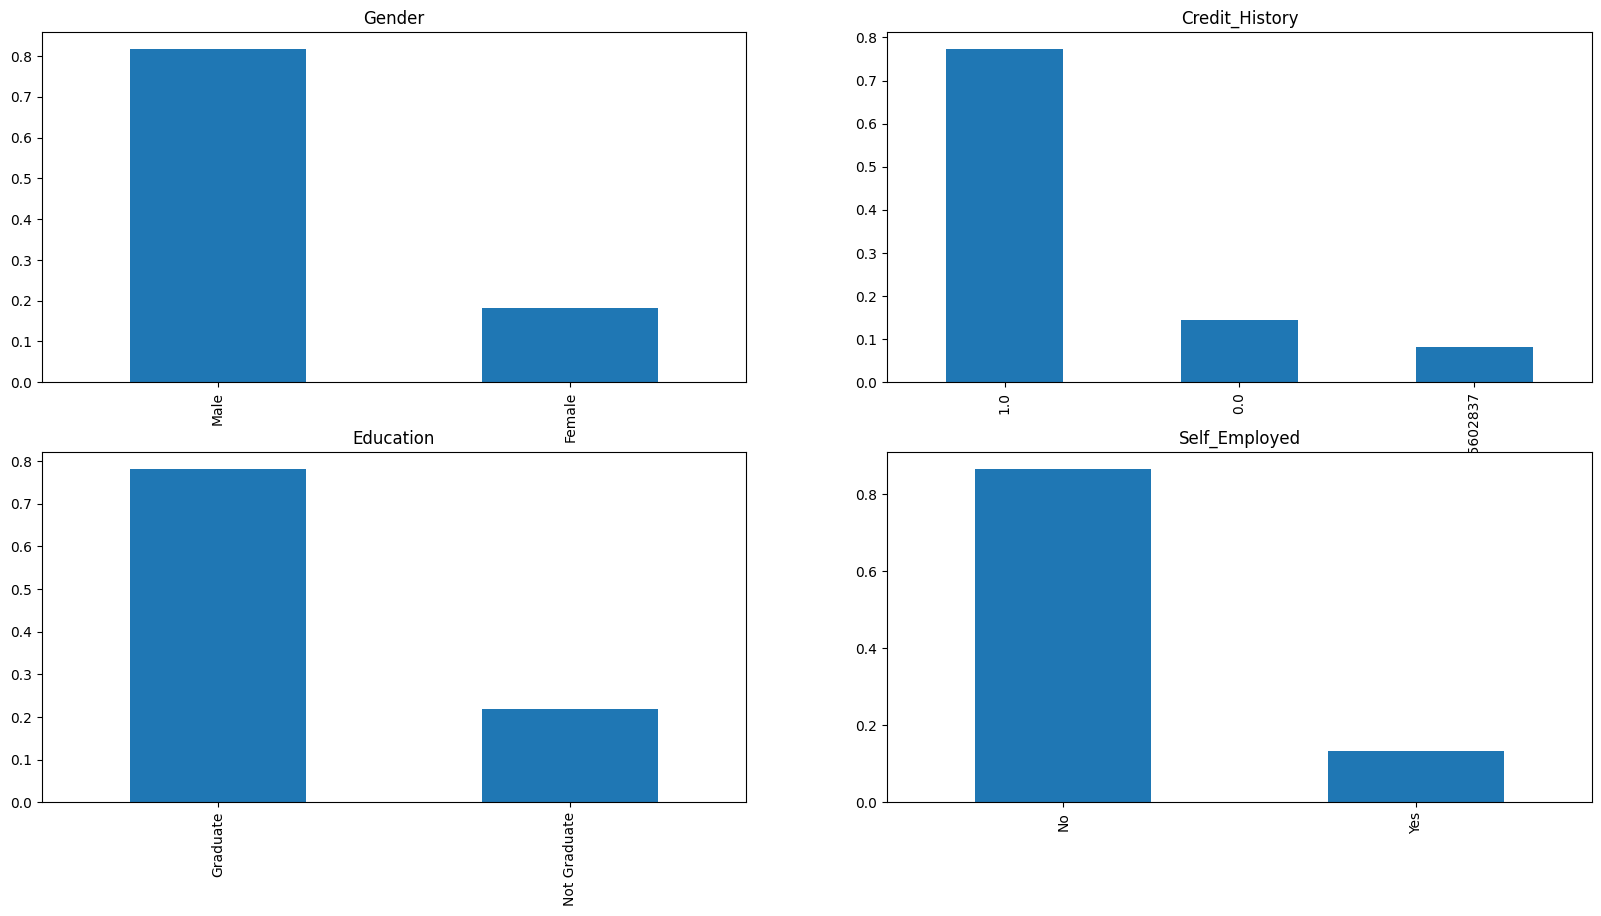

In [ ]:
plt.figure(1)
plt.subplot(221)
train["Gender"].value_counts(normalize=True).plot.bar(figsize=(20,10), title = "Gender")
plt.subplot(222)
train["Credit_History"].value_counts(normalize=True).plot.bar(title = "Credit_History")
plt.subplot(223)
train["Education"].value_counts(normalize=True).plot.bar(title = "Education")
plt.subplot(224)
train["Self_Employed"].value_counts(normalize=True).plot.bar(title = "Self_Employed")

plt.show()

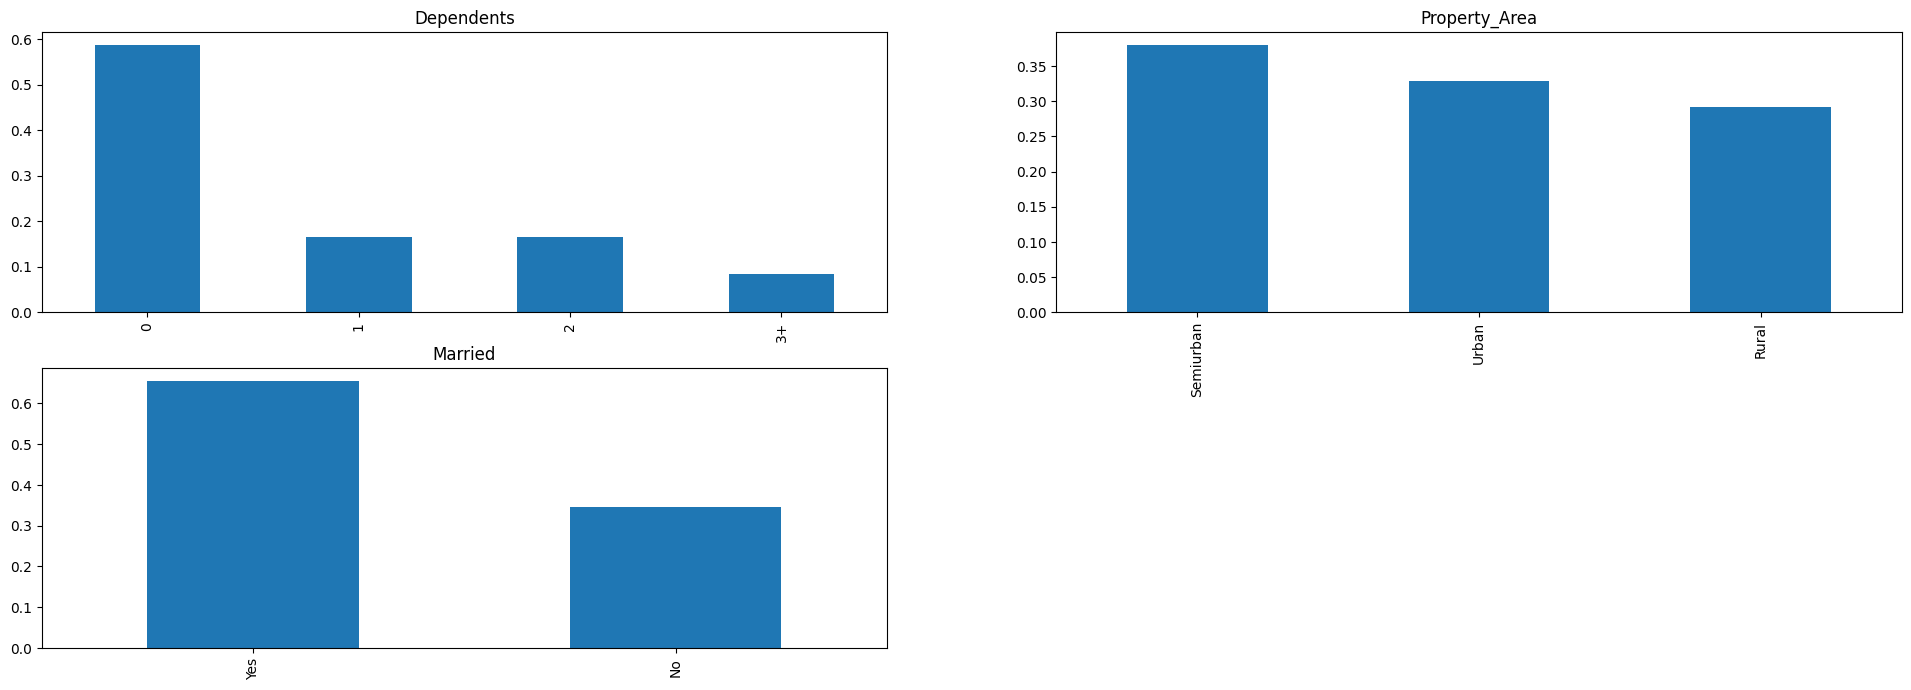

In [ ]:
plt.figure(1)
plt.subplot(221)
train["Dependents"].value_counts(normalize=True).plot.bar(figsize=(24,8), title = "Dependents")
plt.subplot(222)
train["Property_Area"].value_counts(normalize=True).plot.bar(title = "Property_Area")
plt.subplot(223)
train["Married"].value_counts(normalize=True).plot.bar(title = "Married")

plt.show()

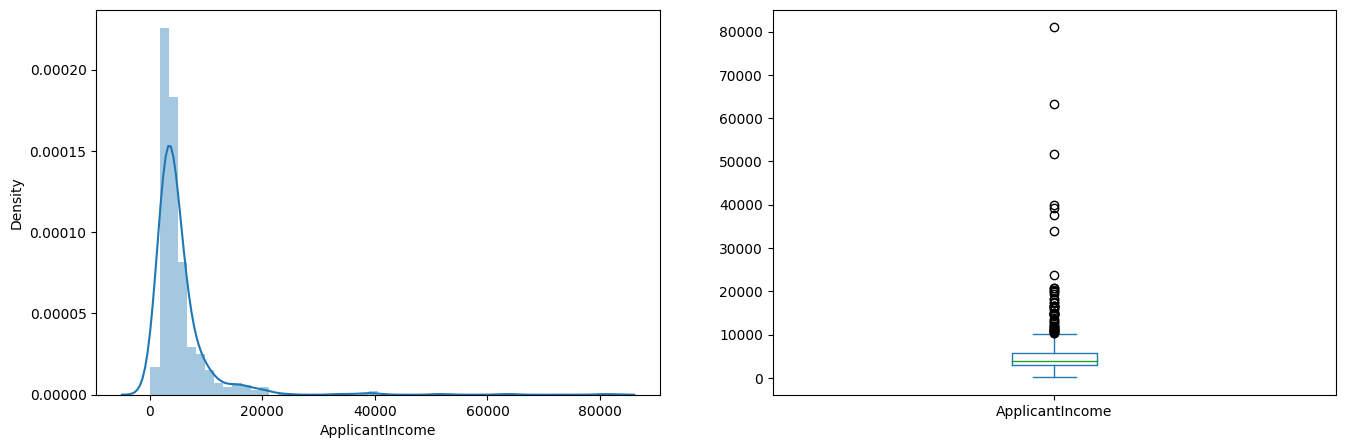

In [ ]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train["ApplicantIncome"])
plt.subplot(122)
train["ApplicantIncome"].plot.box(figsize=(16,5))
plt.show()

Most of the text is towards left which means that the data is not normally distributed.

The box plot confirms the presence of many outliers/ extreme values.

Text(0.5, 0.98, '')

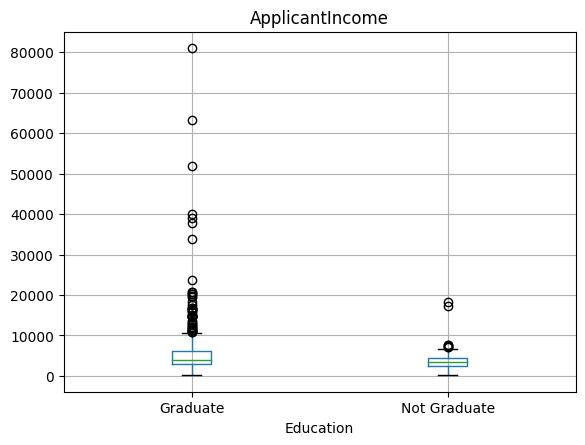

In [ ]:
train.boxplot(column = "ApplicantIncome", by = "Education")
plt.suptitle("")

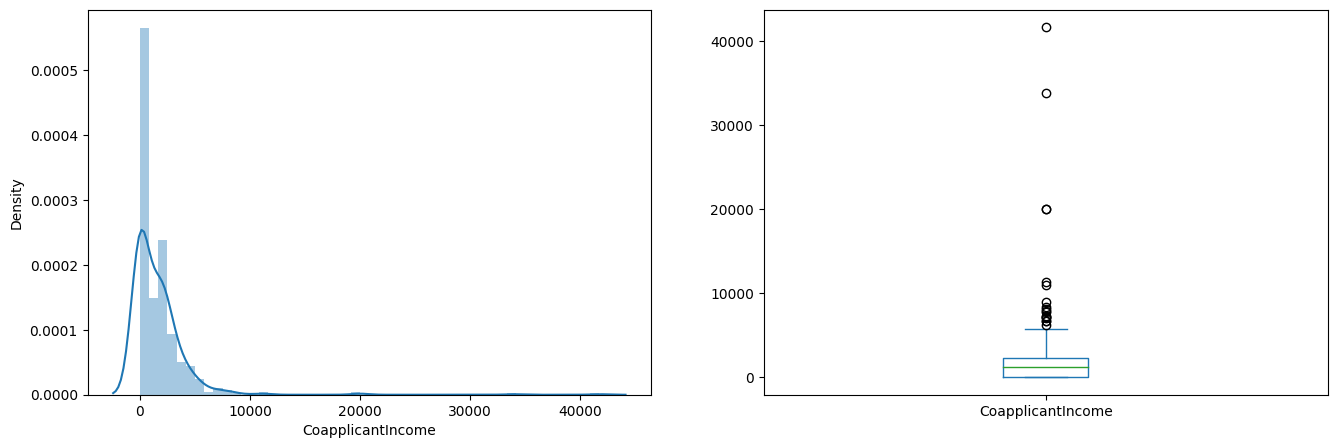

In [ ]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train["CoapplicantIncome"])
plt.subplot(122)
train["CoapplicantIncome"].plot.box(figsize=(16,5))
plt.show()

Text(0.5, 0.98, '')

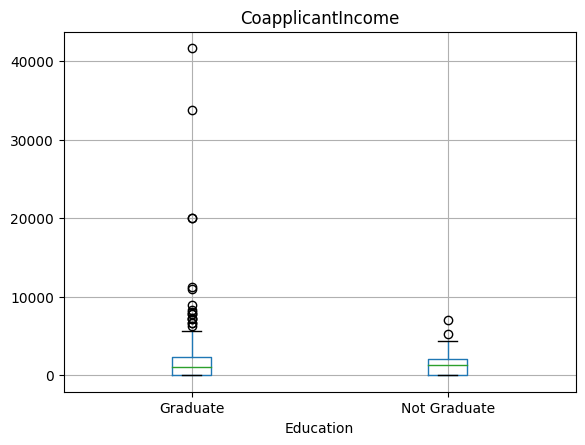

In [ ]:
train.boxplot(column = "CoapplicantIncome", by = "Education")
plt.suptitle("")

<Axes: xlabel='LoanAmount', ylabel='Density'>

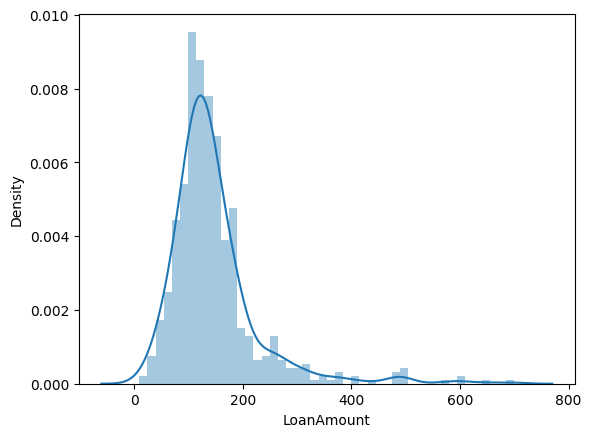

In [ ]:
sns.distplot(train["LoanAmount"])

<Axes: xlabel='Loan_Amount_Term', ylabel='Density'>

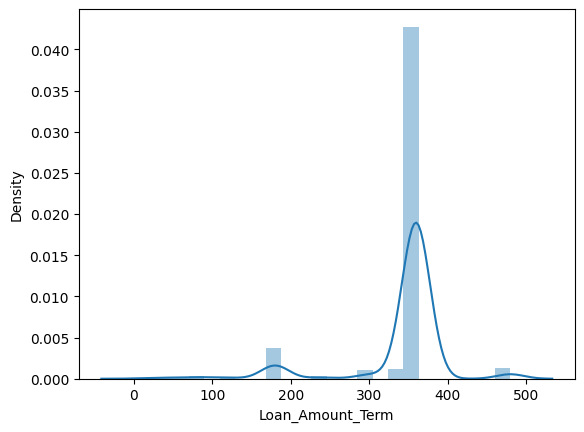

In [ ]:
sns.distplot(train["Loan_Amount_Term"])

<Axes: xlabel='Credit_History', ylabel='Density'>

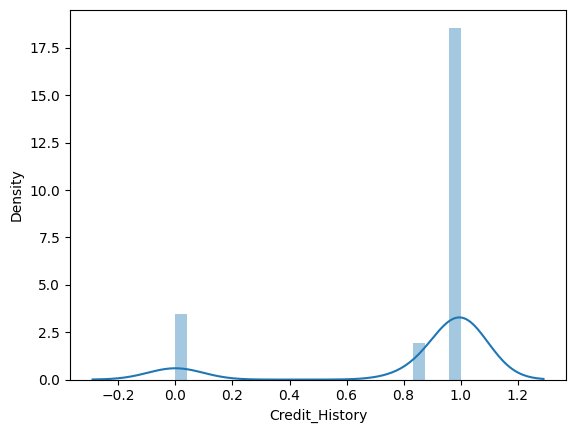

In [ ]:
sns.distplot(train['Credit_History'])

#Creation of new features

In [ ]:
# total income
train['TotalIncome'] = train['ApplicantIncome'] + train['CoapplicantIncome']
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,6000.0


#Log Transformation


<Axes: xlabel='ApplicantIncomeLog', ylabel='Density'>

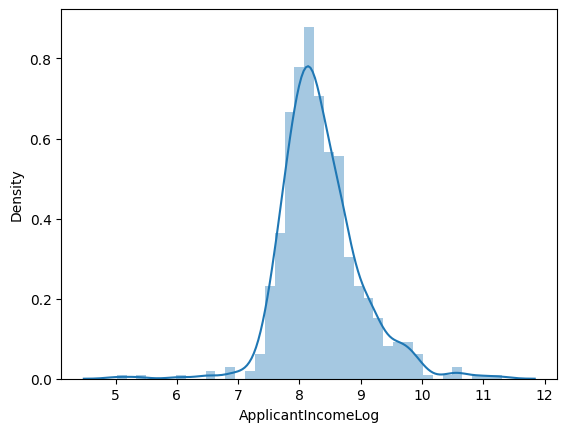

In [ ]:
# apply log transformation to features
train['ApplicantIncomeLog'] = np.log(train['ApplicantIncome']+1)
sns.distplot(train['ApplicantIncomeLog'])

<Axes: xlabel='CoapplicantIncomeLog', ylabel='Density'>

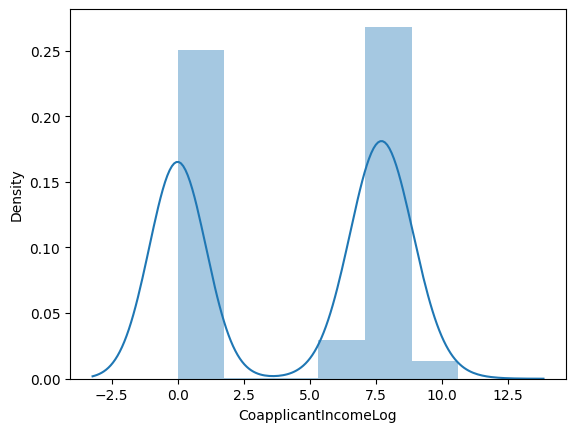

In [ ]:
train['CoapplicantIncomeLog'] = np.log(train['CoapplicantIncome']+1)
sns.distplot(train['CoapplicantIncomeLog'])

<Axes: xlabel='LoanAmountLog', ylabel='Density'>

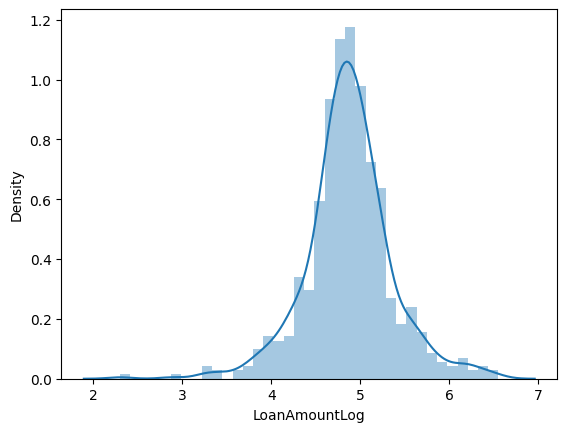

In [ ]:
train['LoanAmountLog'] = np.log(train['LoanAmount']+1)
sns.distplot(train["LoanAmountLog"])

<Axes: xlabel='Loan_Amount_Term_Log', ylabel='Density'>

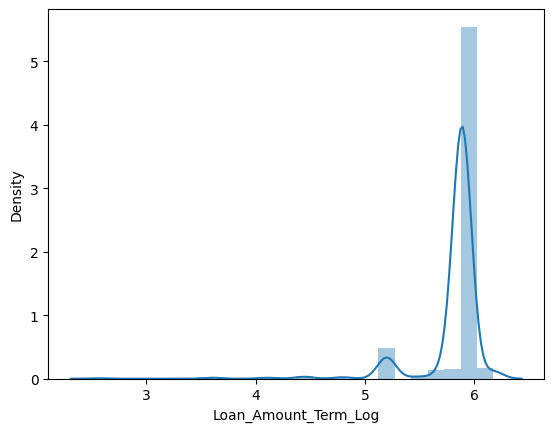

In [ ]:
train['Loan_Amount_Term_Log'] = np.log(train['Loan_Amount_Term']+1)
sns.distplot(train['Loan_Amount_Term_Log'])

<Axes: xlabel='TotalIncomeLog', ylabel='Density'>

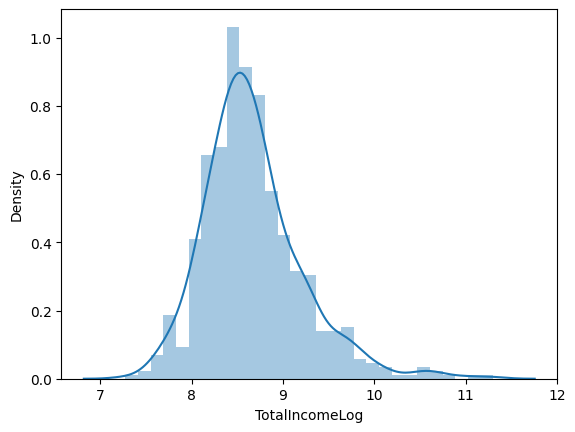

In [ ]:
train['TotalIncomeLog'] = np.log(train['TotalIncome']+1)
sns.distplot(train['TotalIncomeLog'])

#Corelation Matrix

<Axes: >

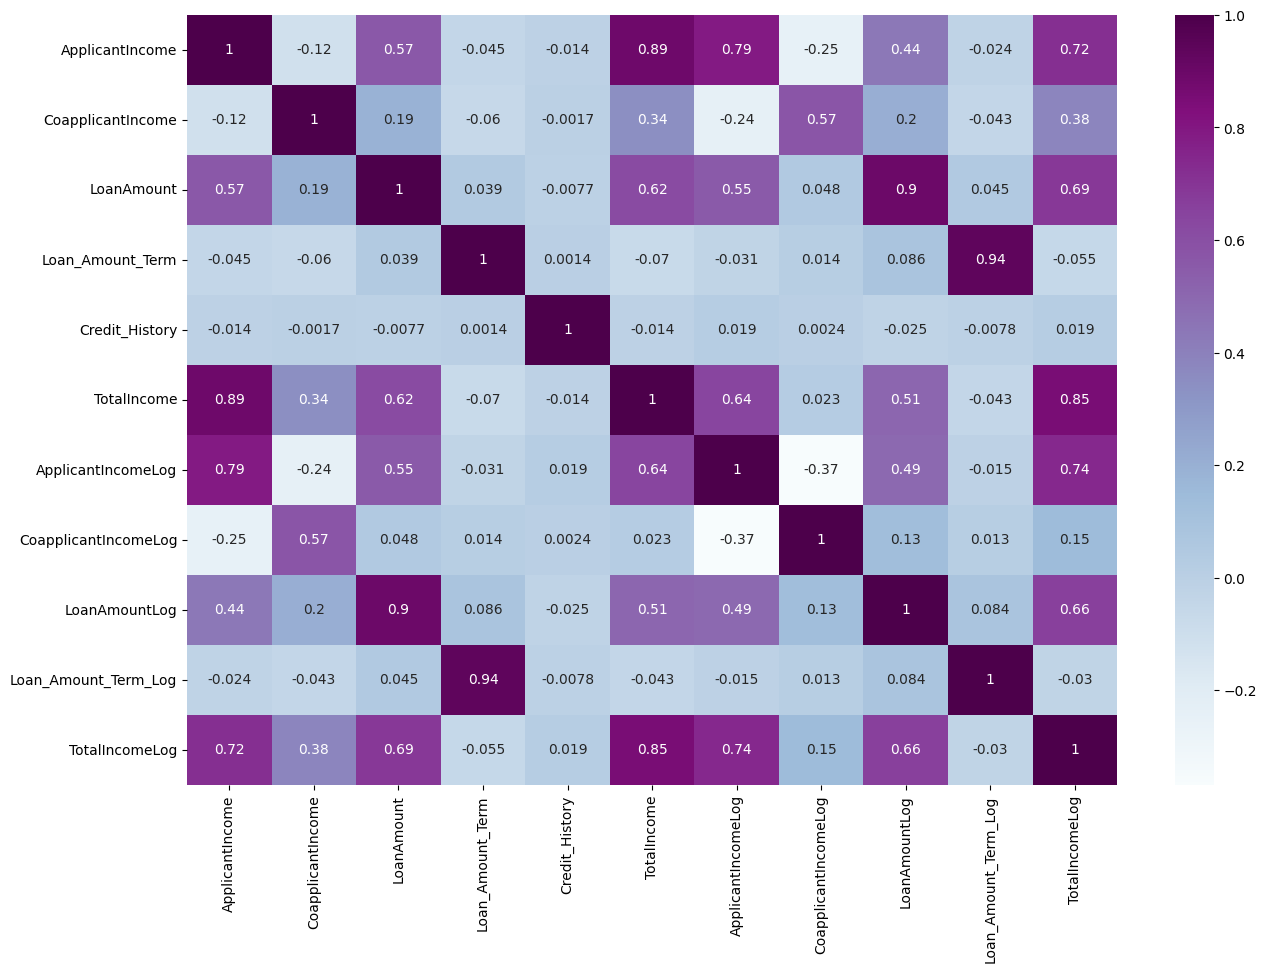

In [ ]:
corr = train.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot = True, cmap="BuPu")

In [ ]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome,ApplicantIncomeLog,CoapplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,TotalIncomeLog
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,5849.0,8.674197,0.000000,4.993232,5.888878,8.674197
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,6091.0,8.430327,7.319202,4.859812,5.888878,8.714732
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,3000.0,8.006701,0.000000,4.204693,5.888878,8.006701
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4941.0,7.857094,7.765993,4.795791,5.888878,8.505525
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,6000.0,8.699681,0.000000,4.955827,5.888878,8.699681


In [ ]:
# dropping unnecessary columns
cols = ['ApplicantIncome', 'CoapplicantIncome', "LoanAmount", "Loan_Amount_Term", "TotalIncome", 'Loan_ID', 'CoapplicantIncomeLog']
train = train.drop(columns=cols, axis=1)
train.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,TotalIncomeLog
0,Male,No,0,Graduate,No,1.0,Urban,Y,8.674197,4.993232,5.888878,8.674197
1,Male,Yes,1,Graduate,No,1.0,Rural,N,8.430327,4.859812,5.888878,8.714732
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y,8.006701,4.204693,5.888878,8.006701
3,Male,Yes,0,Not Graduate,No,1.0,Urban,Y,7.857094,4.795791,5.888878,8.505525
4,Male,No,0,Graduate,No,1.0,Urban,Y,8.699681,4.955827,5.888878,8.699681


#Label Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
cols = ['Gender',"Married","Education",'Self_Employed',"Property_Area","Loan_Status","Dependents"]
le = LabelEncoder()
for col in cols:
    train[col] = le.fit_transform(train[col])

In [ ]:
train.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,TotalIncomeLog
0,1,0,0,0,0,1.0,2,1,8.674197,4.993232,5.888878,8.674197
1,1,1,1,0,0,1.0,0,0,8.430327,4.859812,5.888878,8.714732
2,1,1,0,0,1,1.0,2,1,8.006701,4.204693,5.888878,8.006701
3,1,1,0,1,0,1.0,2,1,7.857094,4.795791,5.888878,8.505525
4,1,0,0,0,0,1.0,2,1,8.699681,4.955827,5.888878,8.699681


#Test Train Split

In [ ]:
# specify input and output attributes
from sklearn.model_selection import train_test_split
X = train.drop(columns=['Loan_Status'], axis=1)
y = train['Loan_Status']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

#Model Training

In [ ]:
# classify function
from sklearn.model_selection import cross_val_score
def classify(model, x, y):
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    model.fit(x_train, y_train)
    print("Accuracy is", model.score(x_test, y_test)*100)
    # cross validation - it is used for better validation of model
    # eg: cv-5, train-4, test-1
    score = cross_val_score(model, x, y, cv=5)
    print("Cross validation is",np.mean(score)*100)

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
classify(model, X, y)

Accuracy is 77.27272727272727
Cross validation is 80.9462881514061


In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
classify(model, X, y)

Accuracy is 70.77922077922078
Cross validation is 72.31507397041183


In [ ]:
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
model = RandomForestClassifier()
classify(model, X, y)

Accuracy is 77.27272727272727
Cross validation is 78.50459816073571


In [ ]:
model = ExtraTreesClassifier()
classify(model, X, y)

Accuracy is 72.72727272727273
Cross validation is 76.22684259629482


#Hyperparameter Tuning

In [ ]:
model = RandomForestClassifier(n_estimators=100, min_samples_split=25, max_depth=7, max_features=1)
classify(model, X, y)

Accuracy is 76.62337662337663
Cross validation is 80.45581767293083


#Confusion Matrix

In [ ]:
model = RandomForestClassifier()
model.fit(x_train, y_train)

RandomForestClassifier()

In [ ]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[23, 31],
       [ 4, 96]])

<Axes: >

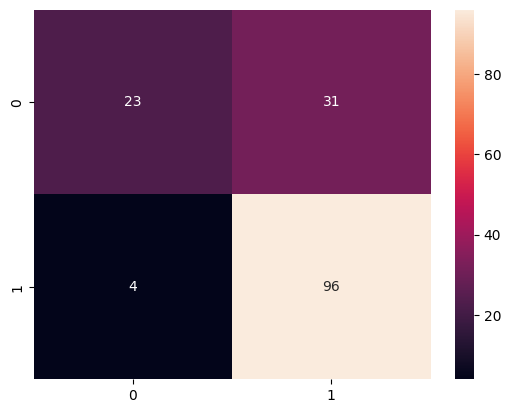

In [ ]:
sns.heatmap(cm, annot=True)